<a href="https://colab.research.google.com/github/IhsanMaulidin/Tugas-/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



## Import Data

In [8]:
df = pd.read_csv('/content/DATA CPA.csv')
df


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A
...,...,...,...,...,...,...
695,0.444264,0.220282,0.144946,0.106833,0.083676,E
696,0.445045,0.220472,0.144977,0.106466,0.083040,E
697,0.445374,0.220198,0.145034,0.106326,0.083069,E
698,0.449798,0.221450,0.143373,0.105009,0.080371,E


## 1. Data Understanding

In [9]:
print("data shape : ", df.shape)

data shape :  (700, 6)


In [10]:
df.describe()

,powLv1,powLv2,powLv3,powLv4,powLv5
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.448182,0.220864,0.144102,0.105245,0.081607
std,0.005319,0.001008,0.001047,0.002236,0.003096
min,0.438026,0.218945,0.140003,0.098109,0.070169
25%,0.444452,0.220191,0.143452,0.103718,0.079350
50%,0.447068,0.220675,0.144344,0.105705,0.082278
75%,0.451886,0.221484,0.144854,0.106833,0.083615
max,0.465233,0.225529,0.145960,0.109487,0.087567


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   powLv1  700 non-null    float64
 1   powLv2  700 non-null    float64
 2   powLv3  700 non-null    float64
 3   powLv4  700 non-null    float64
 4   powLv5  700 non-null    float64
 5   kelas   700 non-null    object 
dtypes: float64(5), object(1)
memory usage: 32.9+ KB


## 2. cleaning data

In [12]:
df.isnull().sum()

powLv1    0
powLv2    0
powLv3    0
powLv4    0
powLv5    0
kelas     0
dtype: int64

In [13]:
df.duplicated().sum()

300

In [15]:
df_clean = df.drop_duplicates()
print(df_clean)

       powLv1    powLv2    powLv3    powLv4    powLv5 kelas
0    0.446692  0.220117  0.144672  0.106003  0.082516     A
1    0.442455  0.219658  0.145039  0.107494  0.085354     A
2    0.446993  0.220535  0.144443  0.105565  0.082465     A
3    0.457090  0.221898  0.141954  0.101666  0.077392     A
4    0.447407  0.220674  0.143812  0.105975  0.082134     A
..        ...       ...       ...       ...       ...   ...
595  0.445821  0.220518  0.144655  0.105942  0.083065     A
596  0.452675  0.221822  0.143071  0.103288  0.079144     A
597  0.441498  0.219512  0.145343  0.108001  0.085647     A
598  0.450119  0.221511  0.143497  0.104316  0.080557     A
599  0.453372  0.222628  0.143082  0.102873  0.078045     A

[400 rows x 6 columns]


In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   powLv1  400 non-null    float64
 1   powLv2  400 non-null    float64
 2   powLv3  400 non-null    float64
 3   powLv4  400 non-null    float64
 4   powLv5  400 non-null    float64
 5   kelas   400 non-null    object 
dtypes: float64(5), object(1)
memory usage: 21.9+ KB


## 3.EDA

<ipython-input-76-e26097585027>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='kelas', data=df, palette='flare')


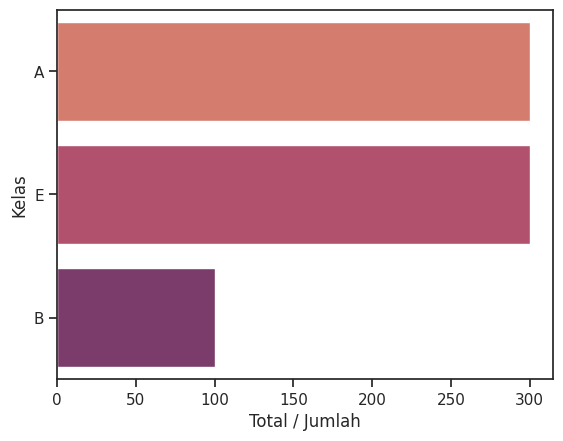

In [76]:
sns.set_theme(style='ticks')
sns.countplot(y='kelas', data=df, palette='flare')
plt.ylabel("Kelas")
plt.xlabel('Total / Jumlah')
plt.show()

## 4. Data Preparation

In [77]:
X = df.drop(columns = ['kelas'])
y = df['kelas']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (700, 5)
y :  (700,)


10 Fold CV

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets

# persiapkan data
X = df.drop(columns = ['kelas'])
y = df['kelas']

#  Inisialisasi model klasifikasi
svm_classifier = svm.SVC(kernel='linear', C=1)

#Cross-validation dengan 10 fold
cv_scores = cross_val_score(svm_classifier, X, y, cv=10)

 #Evaluasi hasil
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-validation Scores: [0.4        0.47142857 0.44285714 0.4        0.45714286 0.48571429
 0.42857143 0.6        0.54285714 0.67142857]
Mean CV Score: 0.49000000000000005


75% Training 25 % Testing

In [71]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['kelas'])
y = df['kelas']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

In [72]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (175, 5)
y_train : (175,)
x_test : (525, 5)
y_test : (525,)


50% Training 25 % validation 25% testing

In [74]:
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
X = df.drop(columns = ['kelas'])
y = df['kelas']

# Bagi data menjadi 50% pelatihan, 25% validasi, dan 25% pengujian
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.33, random_state=42)

#  Inisialisasi dan latih model
svm_classifier = svm.SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Step 4: Validasi model
accuracy_val = svm_classifier.score(X_val, y_val)
print("Validation Accuracy:", accuracy_val)

# Step 5: Evaluasi model
accuracy_test = svm_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.41379310344827586
Test Accuracy: 0.4


## 5. Modeling

In [78]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 4: Latih model
svm_classifier.fit(X_train, y_train)

# Step 5: Prediksi
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))


Accuracy: 0.4
              precision    recall  f1-score   support

           A       0.40      1.00      0.57        70
           B       0.00      0.00      0.00        30
           E       0.00      0.00      0.00        75

    accuracy                           0.40       175
   macro avg       0.13      0.33      0.19       175
weighted avg       0.16      0.40      0.23       175



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
testing = {'powLv1': [0.44855765265335],
        'powLv2': [0.221160624523941],
        'powLv3': [0.144024084911463],
        'powLv4': [
0.104778268223044],
        'powLv5': [0.0814793696882007]}

testing = pd.DataFrame(testing)
testing

,powLv1,powLv2,powLv3,powLv4,powLv5
0,0.448558,0.221161,0.144024,0.104778,0.081479


In [82]:
pred_coba = svm_classifier.predict(testing)
print("Hasil Prediksi kelas")
print(pred_coba)

Hasil Prediksi kelas
['A']
